In [8]:
from benchmark import Tracker

tracker = Tracker()

In [13]:
tracker.load_from_file('benchmark-100.txt')

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

plt.rcParams['figure.figsize'] = [20, 8]

In [48]:
def get_data(index):
    index -= 1
    info = tracker.clue_infos[index]
    neutral_div = sum(info.neutral_dist_avg) / float(tracker.word_counts[index])
    negative_div = sum(info.negative_dist_avg) / float(tracker.word_counts[index])
    return [(dist, 'red') for dist in info.clue_dists] + [(info.neutral_dist_max, 'yellow'),
            ([item / neutral_div for item in info.neutral_dist_avg], 'yellow'),
            (info.negative_dist_max, 'blue'),
            ([item / negative_div for item in info.negative_dist_avg], 'blue'),
            (info.assassin_dist, 'black')]

# Clue Size Distribution:

<BarContainer object of 9 artists>

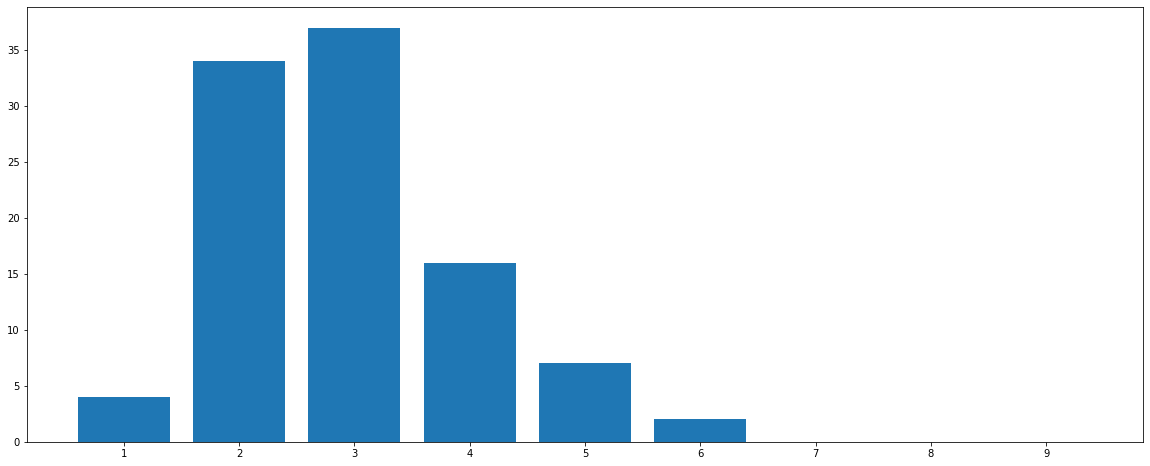

In [49]:
plt.bar([str(index+1) for index in range(9)], tracker.word_counts)

# Clue to Word Similarities

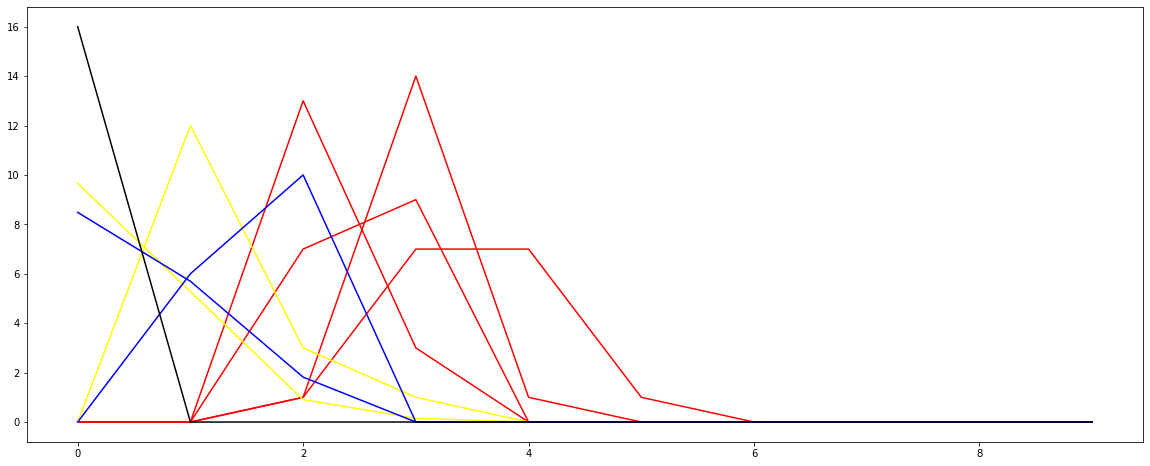

In [56]:
old_data = get_data(4)
data = []
for i, (item, color) in enumerate(old_data):
    item = [sum(item[i*10:(i+1)*10]) for i in range(10)]
    data.append((item, color,))
largest_x = 0
max_value = 0
for item, color in data:
    if max(item) > max_value:
        max_value = max(item)
    for i, v in enumerate(item):
        if i > largest_x and v != 0:
            largest_x = i
for item, color in data:
    plt.plot(item, color=color)
plt.show()